# MAT281 - Laboratorio N°10



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




Empecemos analizando los datos

In [3]:
print("Primero veamos la cantidad de valores unicos y vacios\n") 

resumen = []
for columna in df.columns:
    unico = df[columna].unique()
    vacio = df[columna][df[columna].isna()]
    
    info = pd.DataFrame({
        "columna": [columna],
        "unicos": [len(unico)],
        "vacios": [len(vacio)]
    })
    resumen.append(info)
info_dataframe = pd.concat(resumen).reset_index(drop=True)
print(info_dataframe)


Primero veamos la cantidad de valores unicos y vacios

                    columna  unicos  vacios
0                        id     569       0
1                 diagnosis       2       0
2               radius_mean     456       0
3              texture_mean     479       0
4            perimeter_mean     522       0
5                 area_mean     539       0
6           smoothness_mean     474       0
7          compactness_mean     537       0
8            concavity_mean     537       0
9       concave points_mean     542       0
10            symmetry_mean     432       0
11   fractal_dimension_mean     499       0
12                radius_se     540       0
13               texture_se     519       0
14             perimeter_se     533       0
15                  area_se     528       0
16            smoothness_se     547       0
17           compactness_se     541       0
18             concavity_se     533       0
19        concave points_se     507       0
20              symme

Como se puede ver no hay datos vacios y solo hay 2 diagnosticos por lo que no hay problemas.

Luego veamos algunos datos estadisticos.

In [4]:
print("\nLuego veamos los datos estadisticos de las columnas\n")

print("\n",df.describe())


Luego veamos los datos estadisticos de las columnas


                  id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129    

Como se puede ver, no hay valores negativos y no hay valores fuera de la norma


Luego veamos cuantos diagnosticos hay



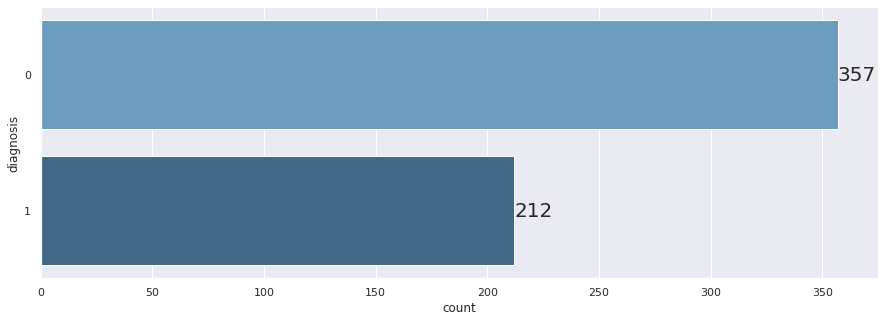

In [5]:
print("\nLuego veamos cuantos diagnosticos hay\n")

plt.figure(figsize=(15,5))
plotting = sns.countplot(
    y = "diagnosis",
    data = df,
    order = df["diagnosis"].value_counts().index,
    palette = "Blues_d",
)
for cont in plotting.containers:
    plotting.bar_label(cont,fontsize=20)
    plt.show

Las cantidades estan correctas, por lo que no hay problemas en los datos

Normalizamos y empezamos la reduccion de dimensionalidad al mismo tiempo, usando un pipeline. Cabe mencionar que se entrenara el modelo PCA. 

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

df_new = df.set_index("id")
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_new)
modelo_pca = pca_pipe.named_steps["pca"]
modelo_pca.components_.shape

(31, 31)

Ahora queremos acceder a las componentes creadas, como tenemos 31 componentes se tendra una matriz 31x31, y haremos un mapa de calor para representarlos

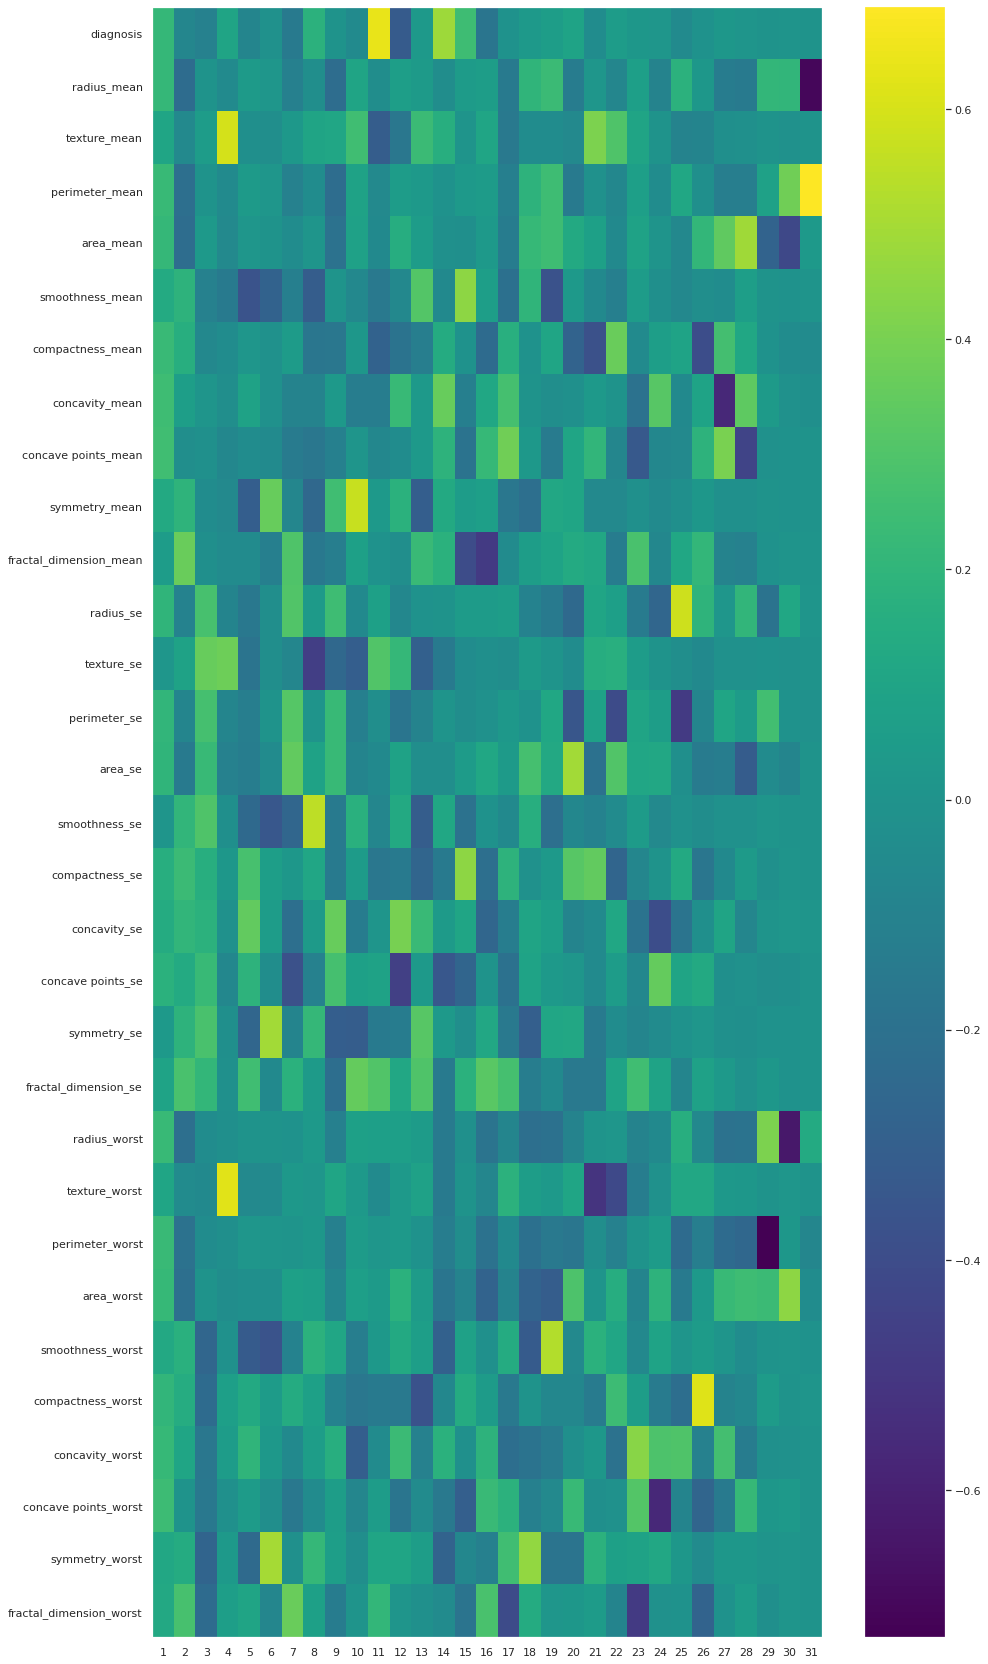

In [7]:

pd.DataFrame(
    data = modelo_pca.components_,
    columns = df_new.columns,
    index = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10",
             "PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","PC20",
             "PC21","PC22","PC23","PC24","PC25","PC26","PC27","PC28","PC29","PC30","PC31"]
)
plt.figure(figsize=(15,30))
componentes = modelo_pca.components_
plt.imshow(componentes.T,cmap="viridis",aspect="auto")
plt.yticks(range(len(df_new.columns)),df_new.columns)
plt.xticks(range(len(df_new.columns)),np.arange(modelo_pca.n_components_)+1)
plt.grid(False)
plt.colorbar();




Asi se puede ahora reducir la dimencion

In [11]:
proyecciones = pca_pipe.transform(X=df_new)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10",
             "PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","PC20",
             "PC21","PC22","PC23","PC24","PC25","PC26","PC27","PC28","PC29","PC30","PC31"],
    index = df_new.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
id,,,,,,,,,,,,,,,,,,,,,
842302,9.225770,2.116196,-0.948109,-3.695778,-1.256280,1.419117,2.194974,-0.315737,-0.156946,-0.889455,...,0.169643,0.081284,0.085396,-0.176795,-0.156546,-0.187547,-0.262048,-0.033109,0.043898,-0.046916
842517,2.655802,-3.784776,-0.502825,-1.123938,0.551107,0.019273,-0.099645,0.385282,-0.711683,1.049263,...,-0.067161,-0.089242,-0.216010,0.008557,-0.171406,-0.043313,0.182637,0.031919,-0.003854,-0.002299
84300903,5.892492,-1.005579,-0.487149,-0.942486,-0.191711,0.541332,-0.660969,0.058983,0.024004,0.456603,...,0.215265,-0.051629,-0.073947,0.109567,0.175480,-0.005903,0.045610,0.047553,0.001533,0.001115
84348301,7.135401,10.318716,-3.339501,-0.085947,-2.938456,3.062748,1.380734,1.150379,-1.405498,-1.123232,...,0.262375,-0.195118,-0.125393,0.157425,0.082025,-0.290911,0.166242,0.042973,-0.071320,-0.019300
84358402,4.129423,-1.905579,1.454000,-2.880175,0.365289,-1.243428,-1.073155,0.717646,-0.263770,0.354929,...,-0.081634,-0.022214,0.140422,-0.017348,0.001300,0.044767,0.037922,-0.035519,0.007297,0.020683


Por tiempo no pude terminar este lab, pero si termine el lab 11 C: